In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [4]:
class PMF(object):
    def __init__(self, values, probs):
        assert len(values) == len(probs)
        self.values = np.array(values)
        self.probs = probs.copy()
        assert sum(self.probs) == 1
    def draw(self, color='green', symbol='o', label=None):
        plt.plot(self.values, self.probs, symbol, color=color, 
                 label=label)
        v_list = []
        p_list = []
        for value, prob in zip(self.values, self.probs):
            v_list.extend([value, value, None])
            p_list.extend([0, prob, None])
        plt.plot(v_list, p_list, '--', color=color)
    def __mul__(self, other):
        return PMF(self.values * other, self.probs)
    def __rmul__(self, other):
        return self.__mul__(other)
    def __add__(self, other):
        return PMF(self.values + other, self.probs)
    def __radd__(self, other):
        return self.__add__(other)
    def __sub__(self, other):
        return PMF(self.values - other, self.probs)
    def __truediv__(self, other):
        return PMF(self.values / other, self.probs)
    def __repr__(self):
        return f"PMF(values={self.values!r}, probs={self.probs!r})"

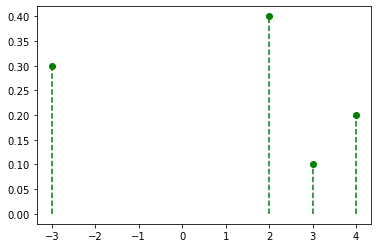

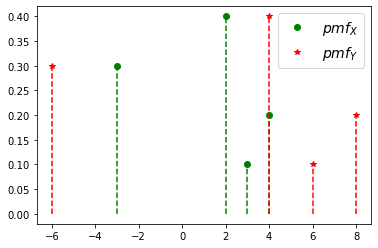

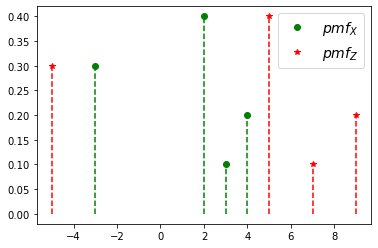

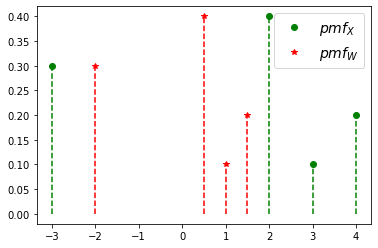

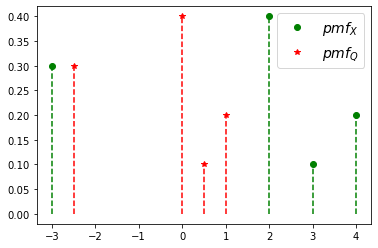

In [5]:
X = PMF(values=[-3, 2, 3, 4], 
        probs=[0.3, 0.4, 0.1, 0.2])
transformations = [2 * X, 2 * X + 1, (X - 1) / 2, X / 2 - 1]

labels = ['Y', 'Z', 'W', 'Q']

plt.figure()
X.draw(label='$pmf_X$')
plt.savefig("pmf_original.png", dpi=200)

for X_, label in zip(transformations, labels):
    plt.figure()
    X.draw(label='$pmf_X$')
    X_.draw(color='red', symbol='*', label=f'$pmf_{label}$')
    plt.legend(fontsize=14)
    plt.savefig(f'pmf_transform_{label}.png', dpi=200)